# El método de Newton

In [1]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

El método de Newton (también llamado algoritmo de Newton-Raphson) constituye otro método numérico iterativo para encontrar raíces de funciones. 

Requiere más información sobre la función, pero a cambio puede funcionar mejor. Derivaremos e implementaremos el método en este notebook.

[1] (Esta pregunta es para llevarse a cabo con papel y pluma.)

Considera una función $f: \mathbb{R} \to \mathbb{R}$.
Supón que $x_0$ es una adivinanza inicial de una raíz, y que $x^*$ es la raíz exacta pero 
desconocida. Sigue los siguientes pasos para derivar el método de Newton.

(i) Supón que $x_0$ es suficientemente cercana a $x^*$. Define $\delta$ como la distancia  (con signo) de $x_0$ desde $x^*$. 

(ii) Escribe la ecuación que corresponde a que $x^*$ sea una raíz de la función, y exprésala en términos de $\delta$. 

(iii) Desarrolla esta ecuación en una serie de Taylor a primer orden, para encontrar un valor aproximado de $\delta$.

(iv) Así encuentra una ecuación para la siguiente aproximación $x_1$ a la raíz, $x_1 = x_0 + \delta$. 

[2] Demuestra que el método Babilónico es un caso especial del método de Newton. [Pista: ¿Para cuál función $f$?]

El método Babilónico, calcula $sqrt(S)$. Y la función es $f(x) = x^2 - S$ 

[3] Escribe una función que implementa el método de Newton. Puedes suponer que el usuario provenga tanto la función `f` como su derivada `fp` como argumentos a la función `newton` (así como la condición inicial `x0`). [Posteriormente veremos cómo evitar tener que proveer también la derivada.]

In [6]:
function Newt(f::Function, fp, x0, n)
    xx = Float64[x0]
    yy = Float64[]
    for i in 1:n
        y = f(xx[i])
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, v
    end
    return xx, yy
end

Newt (generic function with 1 method)

In [3]:
f(x) = x^2

f (generic function with 1 method)

In [4]:
fp(x) = 2x

fp (generic function with 1 method)

In [8]:
x, y = Newt(f, fp, 1, 100)

([1.0,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313  …  4.03897e-28,2.01948e-28,1.00974e-28,5.04871e-29,2.52435e-29,1.26218e-29,6.31089e-30,3.15544e-30,1.57772e-30,7.88861e-31],[0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313,0.000976563  …  4.03897e-28,2.01948e-28,1.00974e-28,5.04871e-29,2.52435e-29,1.26218e-29,6.31089e-30,3.15544e-30,1.57772e-30,7.88861e-31])

[4] Dibuja (e.g. con `Plots.jl`) la dinámica del método iterativo, dada una función $f$ y una condición inicial $x_0$. Para hacerlo, líneas entre $(x_n, 0)$ y $(x_n, f(x_n))$, así como entre $(x_n, f(x_n)$ y $(x_{n+1}, 0)$. Hazlo interactivo con `Interact.jl`. Viendo la figura, interpreta geométricamente lo que está haciendo el método de Newton-Raphson.


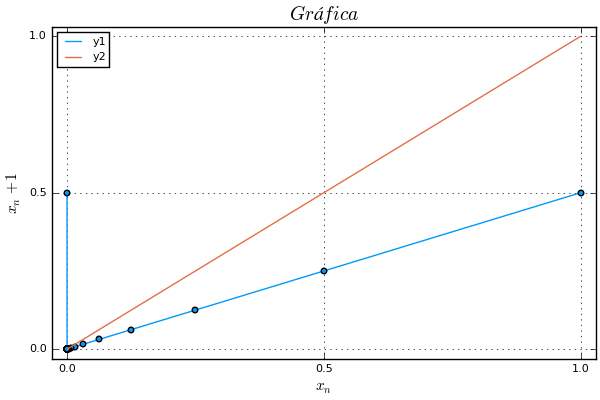

In [18]:
plot(x, y, marker=scatter, xlabel=L"x_n", ylabel=L"x_n+1", title=L"Gráfica")
plot!([i for i in 0:0.1:1], [i for i in 0:0.1:1])
plot!()

[5] Aplica el método de Newton para encontrar raíces de distintas funciones. ¿Qué ocurre si empiezas con distintas condiciones iniciales? Prueba con distintas funciones.

[6] ¿Qué tan rápido converge el método cuando esté cerca de una raíz. Utiliza `BigFloat`s. ¿Es mejor que bisección?

Sin embargo, es posible que el método de Newton *no converja*:

[7] El mismo código del método de Newton debería funcionar con números complejos. Utilízalo para encontrar raíces de la función $f(z) = z^3 -1$ **en el plano complejo**.

Dada una condición inicial, dibuja (por ejemplo) la parte imaginaria de la raíz a la cual converge (por ejemplo, después de un cierto número de pasos). Hazlo para una malla de condiciones iniciales en el plano. ¿Qué es lo que ves?

[8] Haz lo mismo para otras funciones en el plano complejo.

[9] Considera ahora cómo encontrar raíces de un sistema de ecuaciones, escritos en forma vectorial,

$$\mathbf{f}(\mathbf{x}) = \mathbf{0}.$$

Repite un desarrollo siguiendo la pauta de la pregunta [1] en este contexto.
¿Qué es lo que cambia? ¿Qué tipo de operación numérica necesitaríamos para llevar a cabo el método de Newton en este nuevo contexto?